<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch1_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Create the dataset and download it**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Set the random seed for reproducibility
np.random.seed(42)

# Create the dataset
customer_id = np.arange(1, 201)
gender = np.random.choice(['Male', 'Female'], size=200)
age = np.random.normal(loc=40, scale=10, size=200).astype(int)
annual_income = np.random.normal(loc=60, scale=15, size=200).astype(int)
score = np.random.randint(1, 101, size=200)

# Create a DataFrame
customers = pd.DataFrame({
    'Customer ID': customer_id,
    'Gender': gender,
    'Age': age,
    'Annual Income (k$)': annual_income,
    'Score (1-100)': score
})

# Introduce missing values for Annual Income (5% of rows)
num_missing_annual_income = int(0.05 * len(customers))
missing_indices = np.random.choice(customers.index, num_missing_annual_income, replace=False)
customers.loc[missing_indices, 'Annual Income (k$)'] = np.nan

# Introduce missing values for 2% of rows, keeping only Customer ID and Age
num_missing_rows = int(0.02 * len(customers))
missing_rows_indices = np.random.choice(customers.index, num_missing_rows, replace=False)
customers.loc[missing_rows_indices, ['Gender', 'Annual Income (k$)', 'Score (1-100)']] = np.nan

# Save the dataset to a CSV file
customers.to_csv('customers.csv', index=False) # Set index=False to avoid including the index in the CSV file
# Download the created CSV file
files.download('customers.csv')
# Display the first few rows of the dataset
print(customers.head(10))
print(customers.info())
print(customers.describe())
print(customers.isnull().sum())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0            1    Male   40                62.0           14.0
1            2  Female   37                50.0           59.0
2            3    Male   40                61.0           56.0
3            4    Male   20                54.0            7.0
4            5    Male   37                61.0            3.0
5            6  Female   43                 NaN           23.0
6            7    Male   54                83.0           18.0
7            8    Male   34                41.0           38.0
8            9    Male   31                91.0           99.0
9           10  Female   34                30.0           15.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         200 non-null    int64  
 1   Gender              196 non-null    object 
 2   Ag

**Step 1: Load the dataset**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Replace 'your_correct_url.csv' with the actual URL of your CSV file
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/customers.csv'

# Read the CSV file into a Pandas DataFrame (assuming no header row)
customers = pd.read_csv(url, header=None, names=["Customer ID",	"Gender",	"Age",	"Annual Income (k$)",	"Score (1-100)"])  # Adjust header row if needed
print(customers) # Display the first few rows of the dataset
print("\nCustomrs Information")
print(customers.info())
print("\nCustomrs Description")
print(customers.describe())

     Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
1              1    Male   40                  62             14
2              2  Female   37                  50             59
3              3    Male   40                  61             56
4              4    Male   20                  54              7
..           ...     ...  ...                 ...            ...
196          196  Female   25                  25             51
197          197  Female   51                  37             72
198          198  Female   40                  80             42
199          199    Male   30                  84             64
200          200    Male   44                  56             15

[201 rows x 5 columns]

Customrs Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------           

**Step 2: Identify Missing Values**


In [10]:
# Identify missing values
missing_values = customers.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

Missing values before imputation:
Customer ID            0
Gender                 4
Age                    0
Annual Income (k$)    14
Score (1-100)          4
dtype: int64


**Step 2-1: Remove Rows or Columns with High Percentage of Missing Values**

In [11]:
# Remove rows with more than 50% missing values
customers_removed = customers.dropna(thresh=customers.shape[1] * 0.5)

# Show rows affected by removal
removed_rows = customers[~customers.index.isin(customers_removed.index)]
print("Rows removed due to high percentage of missing values:")
print(removed_rows)

print("Customer information after removal:")
customers_removed.info()

Rows removed due to high percentage of missing values:
    Customer ID Gender Age Annual Income (k$) Score (1-100)
28           28    NaN  31                NaN           NaN
116         116    NaN  48                NaN           NaN
134         134    NaN  78                NaN           NaN
141         141    NaN  32                NaN           NaN
Customer information after removal:
<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 200
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         197 non-null    object
 1   Gender              197 non-null    object
 2   Age                 197 non-null    object
 3   Annual Income (k$)  187 non-null    object
 4   Score (1-100)       197 non-null    object
dtypes: object(5)
memory usage: 9.2+ KB


**Step 2-2: Impute Missing Values with Mean Value**

In [12]:
# Impute missing values with the mean value
customers_imputed = customers_removed.copy()

# Convert 'Annual Income (k$)' to numeric, handling errors
customers_imputed['Annual Income (k$)'] = pd.to_numeric(customers_imputed['Annual Income (k$)'], errors='coerce')
# Convert 'Score (1-100)' to numeric, handling errors
customers_imputed['Score (1-100)'] = pd.to_numeric(customers_imputed['Score (1-100)'], errors='coerce') # Convert 'Score' column to numeric

mean_income = customers_imputed['Annual Income (k$)'].mean()
mean_score = customers_imputed['Score (1-100)'].mean()

# Show rows with missing values before imputation
missing_before = customers_imputed[customers_imputed.isnull().any(axis=1)]
print("Rows with missing values before imputation:")
print(missing_before)

# Impute missing values
customers_imputed['Annual Income (k$)'].fillna(mean_income, inplace=True)
customers_imputed['Score (1-100)'].fillna(mean_score, inplace=True)

# Show rows with missing values after imputation
missing_after = customers_imputed[customers_imputed.isnull().any(axis=1)]
print("Rows with missing values after imputation:")
print(missing_after)
print("Customer information after imputation:")
customers_imputed.info()

Rows with missing values before imputation:
     Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0    Customer ID  Gender  Age                 NaN            NaN
6              6  Female   43                 NaN           23.0
39            39    Male   38                 NaN           52.0
84            84  Female   46                 NaN            8.0
102          102  Female   54                 NaN           64.0
105          105  Female   46                 NaN           11.0
121          121  Female   31                 NaN           84.0
124          124    Male   28                 NaN           73.0
137          137    Male   49                 NaN           60.0
160          160  Female   46                 NaN           37.0
173          173    Male   57                 NaN           39.0
Rows with missing values after imputation:
Empty DataFrame
Columns: [Customer ID, Gender, Age, Annual Income (k$), Score (1-100)]
Index: []
Customer information after imputatio

**Step 2-3: Visualize Missing Data`**

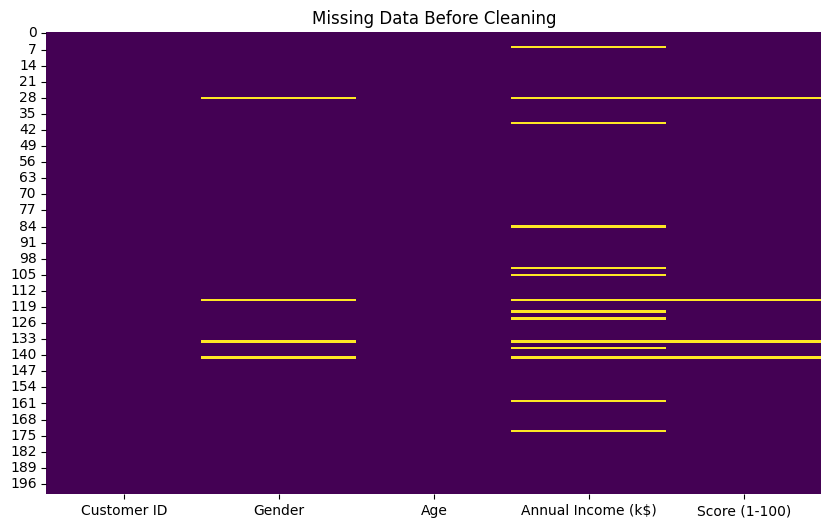

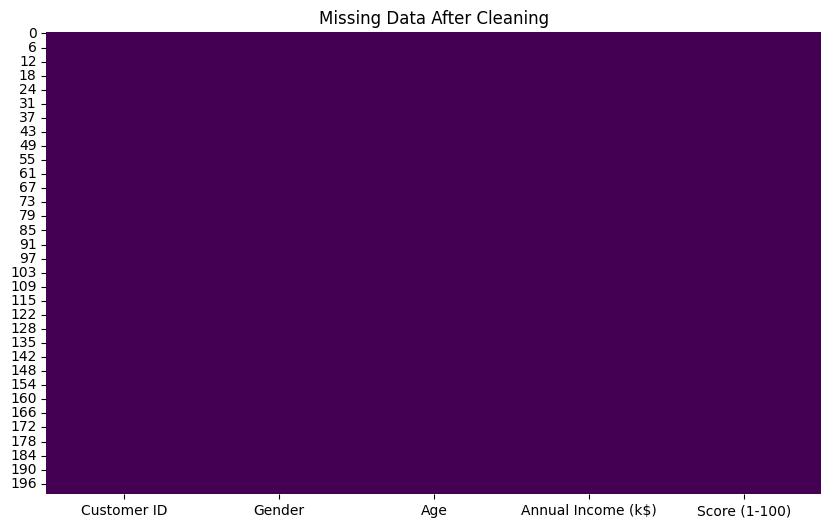

In [13]:
# Visualize missing data before cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Before Cleaning')
plt.show()

# Visualize missing data after cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(customers_imputed.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data After Cleaning')
plt.show()


**Step 2-4: Save the cleaned dataset to a new CSV file**

In [14]:
# Save the cleaned dataset to a CSV file
customers_imputed.to_csv('customers_cleaned.csv', index=False) # Set index=False to avoid including the index in the CSV file
# Download the created CSV file
files.download('customers_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 3:Identify Categorical Columns and Apply Label Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Step 1: Label Encoding for 'Gender' column
label_encoder = LabelEncoder()
customers_encoded = customers_imputed.copy() # Create a copy of the DataFrame
customers_encoded['Gender'] = label_encoder.fit_transform(customers_encoded['Gender'])

print("\nDataset after Label Encoding:\n", customers_encoded.head())

# Step 2: One-Hot Encoding (if needed, here we don't have other categorical features for one-hot encoding)
# If there were additional categorical columns with many unique values, we would apply one-hot encoding here.

# Step 3: Comparison
# No one-hot encoding applied, so only Label Encoding comparison
print("\nComparison of 'Gender' column before and after encoding:")
print(customers_encoded.head())

# Step 4: Save the encoded dataset to a new CSV file
customers_encoded.to_csv('customers_encoded.csv', index=False)

print("\nEncoded dataset saved to 'customers_encoded.csv'")
files.download('customers_encoded.csv')

print("Customer information after label encoding:")
customers_encoded.info()


Dataset after Label Encoding:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID       1  Age           59.978495      47.367347
1            1       2   40           62.000000      14.000000
2            2       0   37           50.000000      59.000000
3            3       2   40           61.000000      56.000000
4            4       2   20           54.000000       7.000000

Comparison of 'Gender' column before and after encoding:
   Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID       1  Age           59.978495      47.367347
1            1       2   40           62.000000      14.000000
2            2       0   37           50.000000      59.000000
3            3       2   40           61.000000      56.000000
4            4       2   20           54.000000       7.000000

Encoded dataset saved to 'customers_encoded.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Customer information after label encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 200
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         197 non-null    object 
 1   Gender              197 non-null    int64  
 2   Age                 197 non-null    object 
 3   Annual Income (k$)  197 non-null    float64
 4   Score (1-100)       197 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 9.2+ KB


**Step 4:Common Feature Scaling Techniques**

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Separate the features for scaling, EXCLUDING the header
features = customers_encoded[['Annual Income (k$)', 'Score (1-100)']].values

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
features_min_max_scaled = min_max_scaler.fit_transform(features)
customers_min_max_scaled = customers_encoded.copy()
customers_min_max_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_min_max_scaled

# Standardization
standard_scaler = StandardScaler()
features_standard_scaled = standard_scaler.fit_transform(features)
customers_standard_scaled = customers_encoded.copy()
customers_standard_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_standard_scaled

# Robust Scaling
robust_scaler = RobustScaler()
features_robust_scaled = robust_scaler.fit_transform(features)
customers_robust_scaled = customers_encoded.copy()
customers_robust_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_robust_scaled

# MaxAbs Scaling
max_abs_scaler = MaxAbsScaler()
features_max_abs_scaled = max_abs_scaler.fit_transform(features)
customers_max_abs_scaled = customers_encoded.copy()
customers_max_abs_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_max_abs_scaled

# Display the scaled datasets
print("Original Dataset:\n", customers.head())
print("\nMin-Max Scaled Dataset:\n", customers_min_max_scaled.head())
print("\nStandardized Dataset:\n", customers_standard_scaled.head())
print("\nRobust Scaled Dataset:\n", customers_robust_scaled.head())
print("\nMaxAbs Scaled Dataset:\n", customers_max_abs_scaled.head())

# Save the encoded datasets to new CSV files
customers_min_max_scaled.to_csv('min_max_scaled_customers.csv', index=False)
customers_standard_scaled.to_csv('standard_scaled_customers.csv', index=False)
customers_robust_scaled.to_csv('robust_scaled_customers.csv', index=False)
customers_max_abs_scaled.to_csv('max_abs_scaled_customers.csv', index=False)

print("\nScaled datasets saved to CSV files.")

Original Dataset:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
1            1    Male   40                  62             14
2            2  Female   37                  50             59
3            3    Male   40                  61             56
4            4    Male   20                  54              7

Min-Max Scaled Dataset:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID       1  Age            0.522067       0.468357
1            1       2   40            0.552239       0.131313
2            2       0   37            0.373134       0.585859
3            3       2   40            0.537313       0.555556
4            4       2   20            0.432836       0.060606

Standardized Dataset:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID       1  Age            0.000000       0.000000
1            1       2   40            0.148196  

**Plotting the scaled datasets**


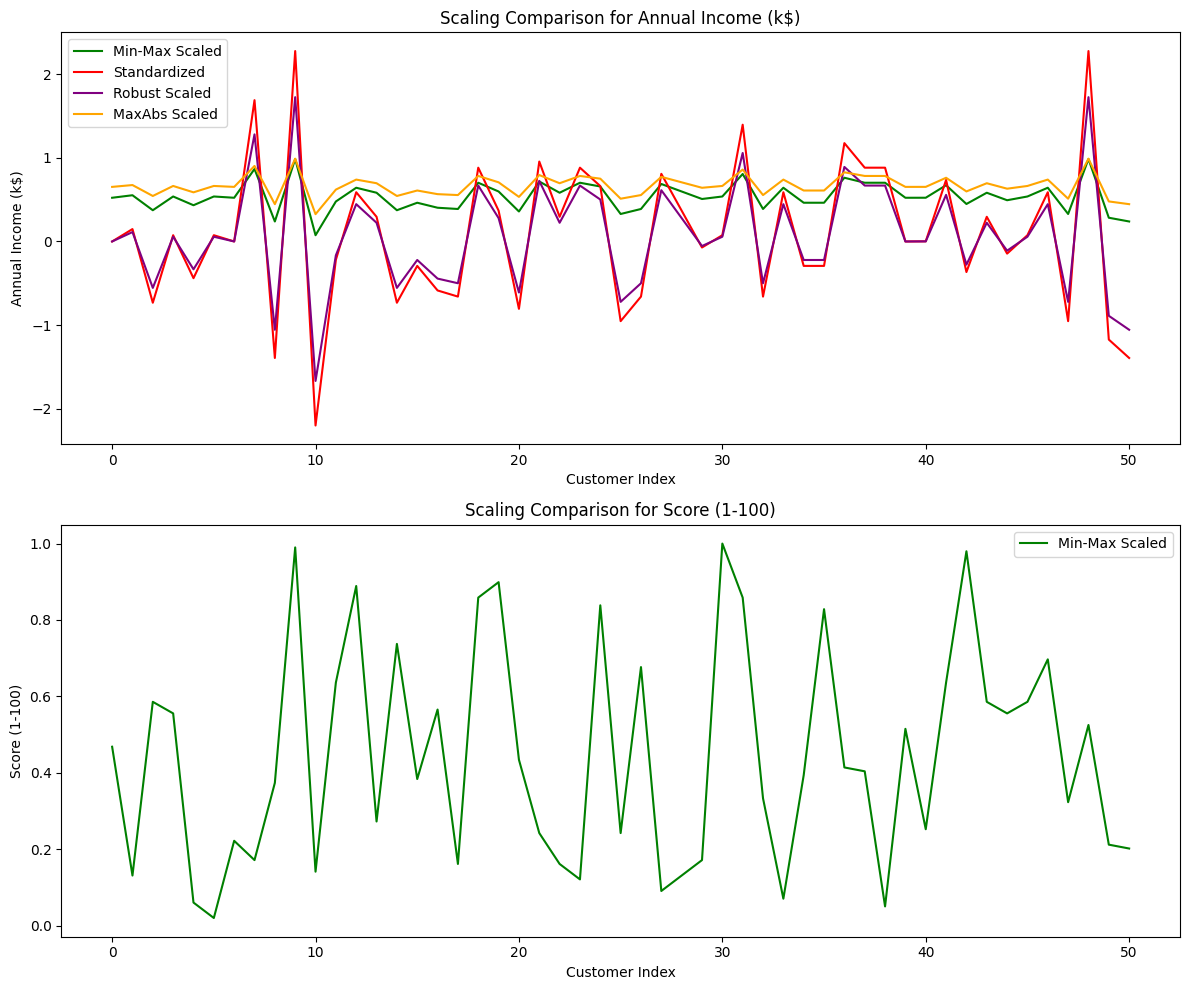

In [36]:
# Plotting
samples=50
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot for "Annual Income (k$)"
# Convert index to a list for numerical plotting
x_values = list(customers_encoded.index[:samples])
# axs[0].plot(x_values, customers_encoded['Annual Income (k$)'], label='Original', color='blue')
axs[0].plot(x_values, customers_min_max_scaled['Annual Income (k$)'][:samples], label='Min-Max Scaled', color='green')
axs[0].plot(x_values, customers_standard_scaled['Annual Income (k$)'][:samples], label='Standardized', color='red')
axs[0].plot(x_values, customers_robust_scaled['Annual Income (k$)'][:samples], label='Robust Scaled', color='purple')
axs[0].plot(x_values, customers_max_abs_scaled['Annual Income (k$)'][:samples], label='MaxAbs Scaled', color='orange')
axs[0].set_title('Scaling Comparison for Annual Income (k$)')
axs[0].set_xlabel('Customer Index')
axs[0].set_ylabel('Annual Income (k$)')
axs[0].legend()

# Plot for "Score (1-100)"
# axs[1].plot(x_values, customers_encoded['Score (1-100)'], label='Original', color='blue')
axs[1].plot(x_values, customers_min_max_scaled['Score (1-100)'][:samples], label='Min-Max Scaled', color='green')
axs[1].plot(x_values, customers_standard_scaled['Score (1-100)'][:samples], label='Standardized', color='red')
axs[1].plot(x_values, customers_robust_scaled['Score (1-100)'][:samples], label='Robust Scaled', color='purple')
axs[1].plot(x_values, customers_max_abs_scaled['Score (1-100)'][:samples], label='MaxAbs Scaled', color='orange')
axs[1].set_title('Scaling Comparison for Score (1-100)')
axs[1].set_xlabel('Customer Index')
axs[1].set_ylabel('Score (1-100)')
axs[1].legend()

plt.tight_layout()
plt.show()